In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
statcast_2017 = pd.read_csv(r'C:\Users\602353\Documents\archive\Statcast_2017.csv')
statcast_2018 = pd.read_csv(r'C:\Users\602353\Documents\archive\Statcast_2018.csv')
statcast_2019 = pd.read_csv(r'C:\Users\602353\Documents\archive\Statcast_2019.csv')
statcast_2021 = pd.read_csv(r'C:\Users\602353\Documents\archive\Statcast_2021.csv')


In [61]:
statcast_2017_pitching = statcast_2017[['pitch_type', 'release_speed', 'player_name', 'release_spin_rate', 'pfx_z', 'pfx_x', 'game_date']]
statcast_2017_pitching = statcast_2017_pitching.set_axis(['pitch_type', 'velocity', 'pitcher', 'spin_rate', 'vertical_movement', 'horizontal_movement' , 'date'], axis=1)
statcast_2017_pitching.dropna(inplace=True) 

statcast_2018_pitching = statcast_2018[['pitch_type', 'release_speed', 'player_name', 'release_spin_rate', 'pfx_z', 'pfx_x', 'game_date']]
statcast_2018_pitching = statcast_2018_pitching.set_axis(['pitch_type', 'velocity', 'pitcher', 'spin_rate', 'vertical_movement', 'horizontal_movement', 'date'], axis=1)
statcast_2018_pitching.dropna(inplace=True) 

statcast_2019_pitching = statcast_2019[['pitch_type', 'release_speed', 'player_name', 'release_spin_rate', 'pfx_z', 'pfx_x', 'game_date']]
statcast_2019_pitching = statcast_2019_pitching.set_axis(['pitch_type', 'velocity', 'pitcher', 'spin_rate', 'vertical_movement', 'horizontal_movement', 'date'], axis=1)
statcast_2019_pitching.dropna(inplace=True) 

statcast_2021_pitching = statcast_2021[['pitch_type', 'release_speed', 'player_name', 'release_spin_rate', 'pfx_z', 'pfx_x', 'game_date']]
statcast_2021_pitching = statcast_2021_pitching.set_axis(['pitch_type', 'velocity', 'pitcher', 'spin_rate', 'vertical_movement', 'horizontal_movement', 'date'], axis=1)
statcast_2021_pitching.dropna(inplace=True) 

In [62]:
statcast_pitching_data = pd.concat([statcast_2017_pitching, statcast_2018_pitching, statcast_2019_pitching, statcast_2021_pitching])
degrom_data = statcast_pitching_data[statcast_pitching_data['pitcher'] == 'deGrom, Jacob']

degrom_data['year'] = degrom_data['date'].str[:4]

C:\Users\602353\AppData\Local\Temp\12\ipykernel_28788\3106340346.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  degrom_data['year'] = degrom_data['date'].str[:4]


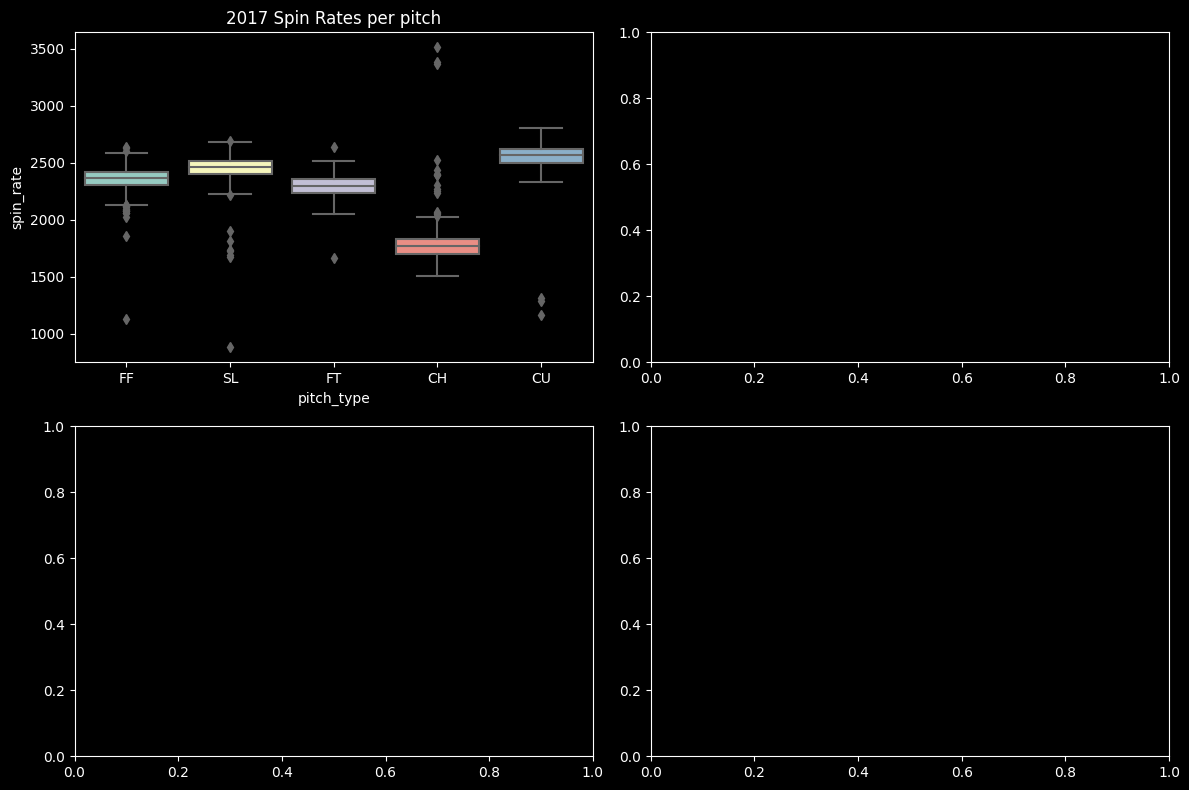

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [63]:
unique_values = degrom_data['year'].unique()

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for i, value in enumerate(unique_values):
    row = i // 2
    col = i % 2

    filtered_data = degrom_data[degrom_data['year'] == value]

    sns.boxplot(x=filtered_data['pitch_type'], y=filtered_data['spin_rate'], ax=axes[row, col])
    axes[row, col].set_title(f'{value} Spin Rates per pitch')

    plt.tight_layout()
    plt.show()

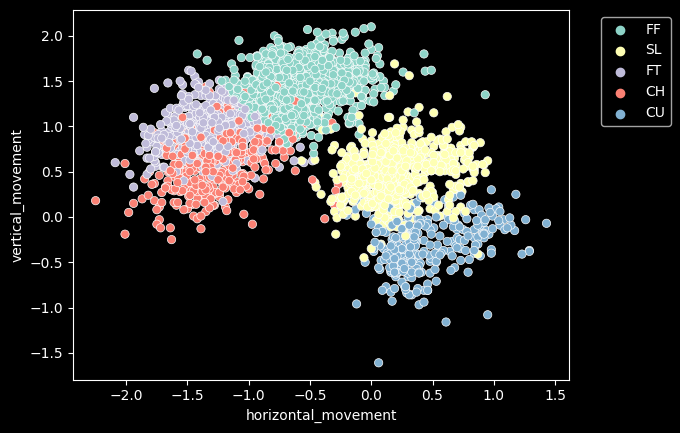

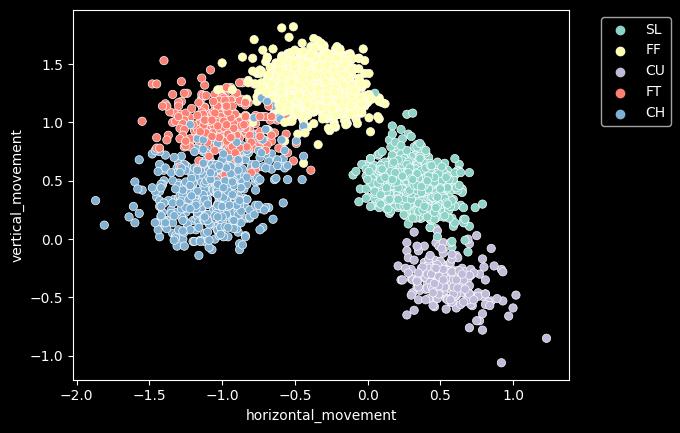

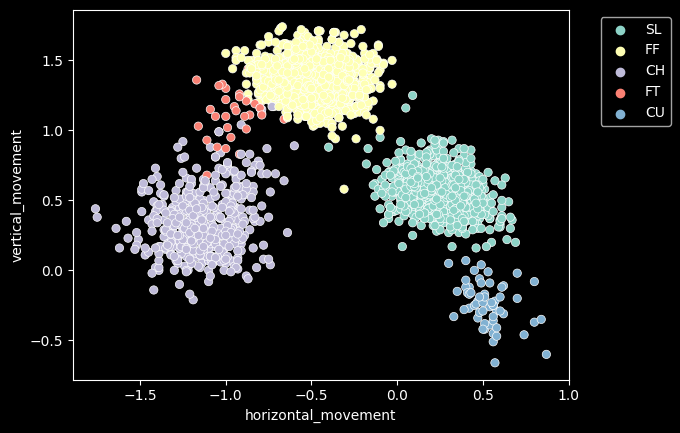

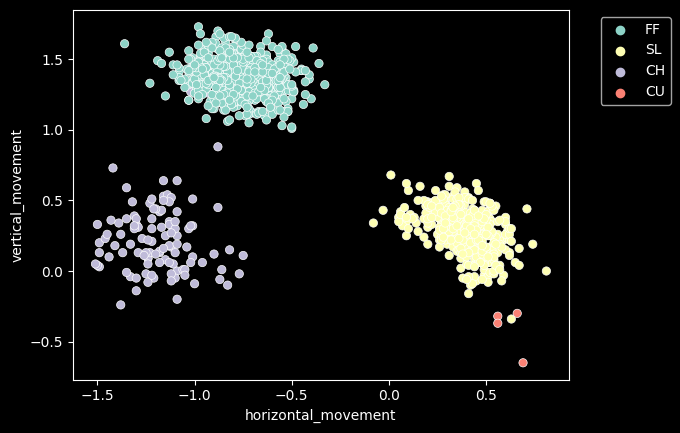

In [64]:
for value in unique_values:
    filtered_data = degrom_data[degrom_data['year'] == value]

    sns.scatterplot(x='horizontal_movement', y='vertical_movement', hue='pitch_type', data=filtered_data)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

